# In this notebook we will examine dMRI metrics on the midthickness surface and perform hippocampal spin testing to analyze their spatial overlap

The assumptions are the same as the `tutorial_fmri.ipynb` notebook:
- HippUnfold was ran on the native space T1w image
- dMRI data was processed using the NODDI and DTI model and registered to the T1w image

We will further assume that the data has been sampled along the midthickness surface, and you can load and visualize the surface data (can refer to the `tutorial_fmri.ipynb` notebook for this)


### Here are the metrics in volume space

![ODI and NDI]('/figures/micro_fullbrain.png')

We have the orientation dispersion index representing the orientational heterogeneity of microstructure and the neurite density index, representing the density of "stick" like geometries (i.e. axons and dendrites). We will also compare these to the T1w/T2w ratio as a proxy of myelin content
Furthermore we will look at the common DTI metrics of FA and MD

We now assume that you have sampled these metrics on the midthickness surface, lets visualize them in unfolded space to see what they look like:

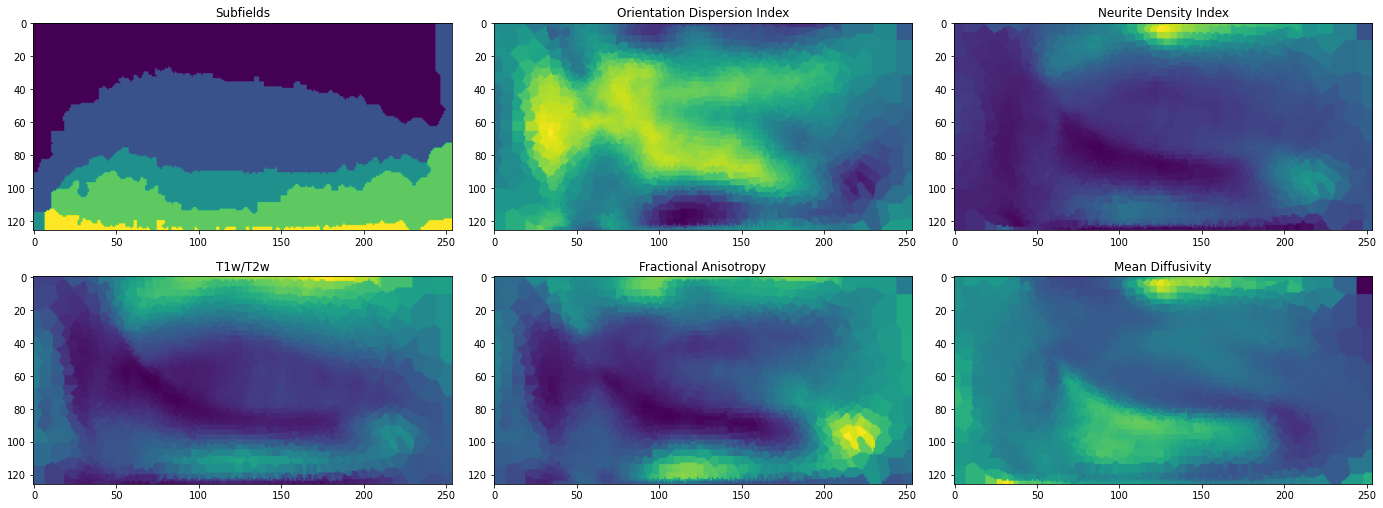

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
sys.path.insert(1, '/home/ROBARTS/bkarat/graham/scratch/hippunfold_toolbox')
from hippunfold_toolbox import plotting
from hippunfold_toolbox.utils import density_interp

#Load in example maps + subfields
ODI_path = 'data/ODI_midsurf_L.shape.gii'
NDI_path = 'data/NDI_midsurf_L.shape.gii'
T1divT2_path = 'data/T1wdivT2w_midsurf_L.shape.gii'
sub_path = 'data/subfield_midsurf_L.label.gii'
FA_path = 'data/FA_midsurf_L.shape.gii'
MD_path = 'data/MD_midsurf_L.shape.gii'
#Load data for visualization only

ODIdata = nib.load(ODI_path).agg_data()
NDIdata = nib.load(NDI_path).agg_data()
T1divT2data = nib.load(T1divT2_path).agg_data()
subdata = nib.load(sub_path).agg_data()
FAdata = nib.load(FA_path).agg_data()
MDdata = nib.load(MD_path).agg_data()
NDIdatainterp = density_interp('1mm','unfoldiso',NDIdata,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
NDIdatainterp = np.reshape(NDIdatainterp,(126,254))#get maps to 124x256
ODIdatainterp = density_interp('1mm','unfoldiso',ODIdata,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
ODIdatainterp = np.reshape(ODIdatainterp,(126,254))#get maps to 124x256
T1divT2datainterp = density_interp('1mm','unfoldiso',T1divT2data,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
T1divT2datainterp = np.reshape(T1divT2datainterp,(126,254))#get maps to 124x256
subdatainterp = density_interp('1mm','unfoldiso',subdata,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
subdatainterp = np.reshape(subdatainterp,(126,254))#get maps to 124x256
FAdatainterp = density_interp('1mm','unfoldiso',FAdata,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
FAdatainterp = np.reshape(FAdatainterp,(126,254))#get maps to 124x256
MDdatainterp = density_interp('1mm','unfoldiso',MDdata,resources_dir='/home/ROBARTS/bkarat/graham/scratch/hippdev/hippunfold/hippunfold/resources')[0]
MDdatainterp = np.reshape(MDdatainterp,(126,254))#get maps to 124x256

#Visualize example maps
fig, axs = plt.subplots(2,3,figsize=(24,18))
axs[0,0].imshow(subdatainterp)
axs[0,0].set_title('Subfields')
axs[0,1].imshow(ODIdatainterp)
axs[0,1].set_title('Orientation Dispersion Index')
axs[0,2].imshow(NDIdatainterp)
axs[0,2].set_title('Neurite Density Index')
axs[1,0].imshow(T1divT2datainterp)
axs[1,0].set_title('T1w/T2w')
axs[1,1].imshow(FAdatainterp)
axs[1,1].set_title('Fractional Anisotropy')
axs[1,2].imshow(MDdatainterp)
axs[1,2].set_title('Mean Diffusivity')
plt.subplots_adjust(wspace=0.1, hspace=-0.65)
plt.show()



In [48]:
#Load in spin test module
sys.path.insert(1, '/home/ROBARTS/bkarat/graham/scratch/Hippo_Spin_Testing')
from hippo_spin_testing import interpolate_densities
from hippo_spin_testing import spin_test

### We will now perform spin testing on some of the above maps. To find a significant p-value is to say that the extent of the association when the two maps are aligned is improbable to have resulted from a random (i.e. spun) alignment of the surfaces

p-value between NDI and T1w/T2w = 0.0


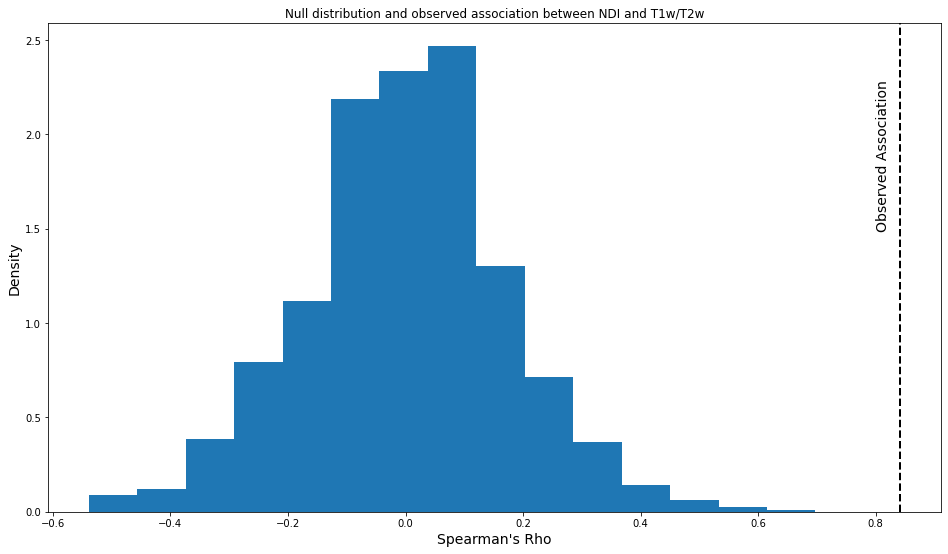

In [65]:
[metricnull,permutedimg,pval,r_obs] = spin_test.spin_test(T1divT2_path,NDI_path,2000,'spearman')

print(f'p-value between NDI and T1w/T2w = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(0.8,1.5,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and T1w/T2w')
plt.show()

### We can see that there is significant overlap between T1w/T2W and NDI

p-value between NDI and ODI = 0.0015


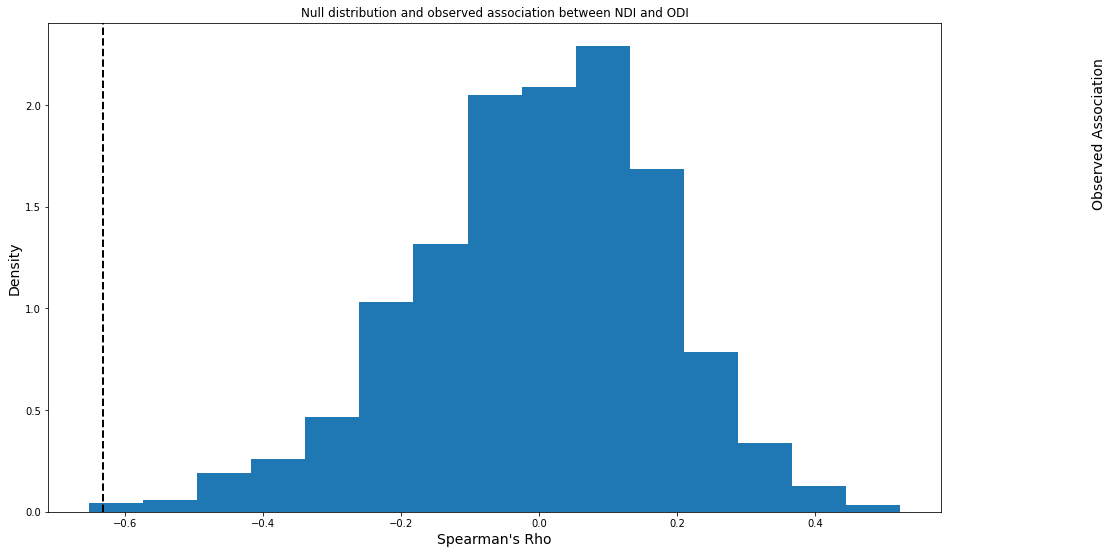

In [66]:
[metricnull,permutedimg,pval,r_obs] = spin_test.spin_test(ODI_path,NDI_path,2000,'spearman')
print(f'p-value between NDI and ODI = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(0.8,1.5,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and ODI')
plt.show()

p-value between MD and ODI = 0.482


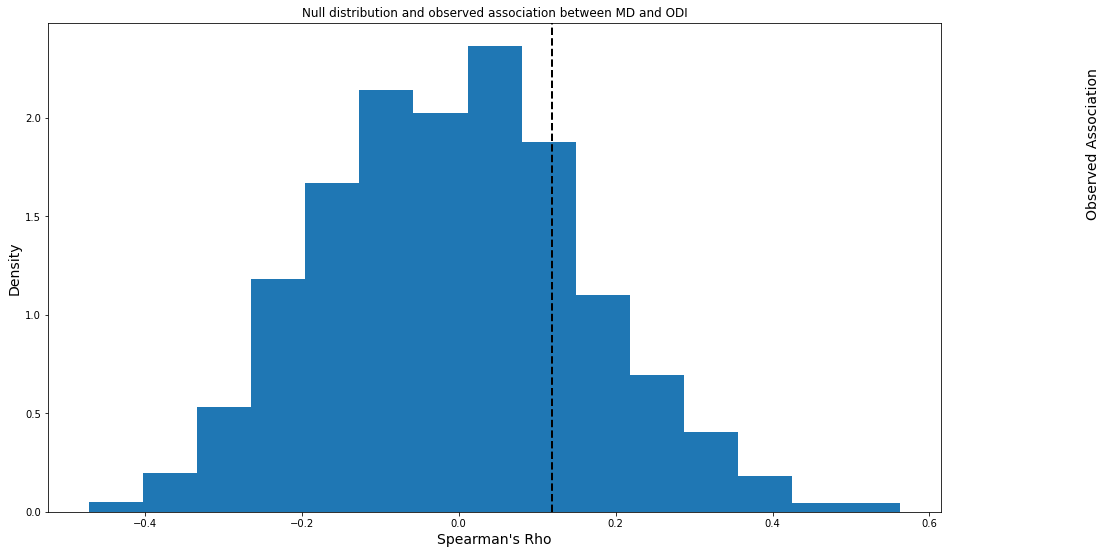

In [67]:
[metricnull,permutedimg,pval,r_obs] = spin_test.spin_test(ODI_path,MD_path,2000,'spearman')
print(f'p-value between MD and ODI = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(0.8,1.5,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between MD and ODI')
plt.show()

### We can see ODI and MD are not significantly overlapping